# AML Group Project

### Data consists of 72 samples: 44 standard risks and 28 low risk patients. Data consists of 471 genes across all samples.

## 1. Read Data & Display Data

In [198]:
aml.data <- read.table("clinical_9A_standard_low_risk_sd3.txt", sep="\t", header=TRUE)

# aml.data

## 2. Seprate Data

In [199]:
stand.data <- aml.data[1:44, ] # standard risks
low.data <- aml.data[45:72, ]  # low risks

# stand.data
# low.data

# dim(stand.data)
# dim(low.data)

## 3. Exploring Data

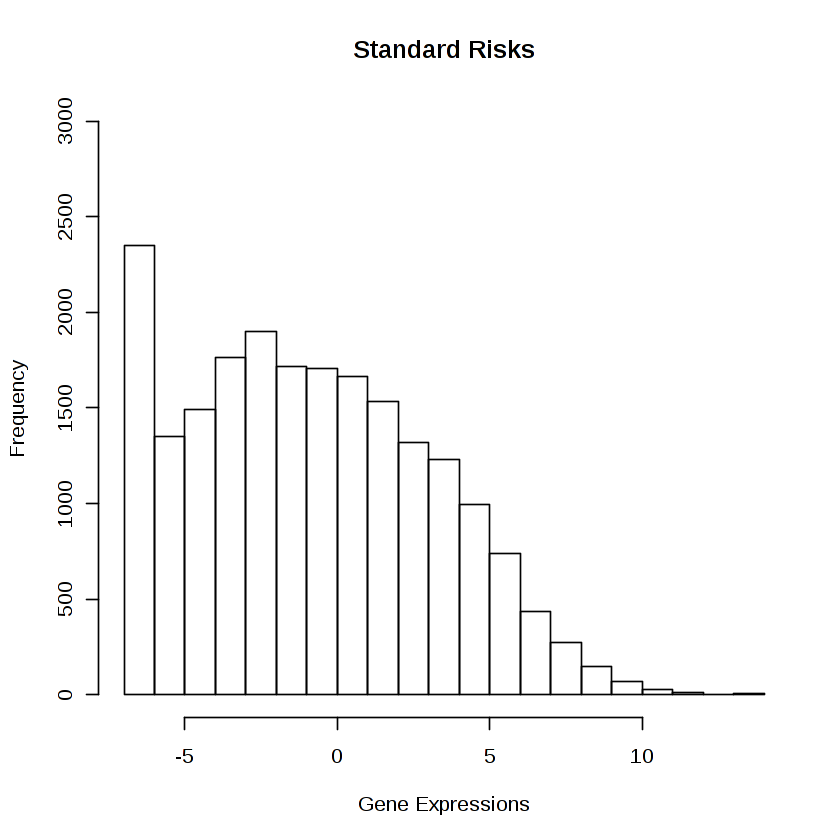

In [200]:
# Graph standard risks
hist(as.numeric(unlist(stand.data)), main="Standard Risks", xlab="Gene Expressions", ylim=c(0,3000))

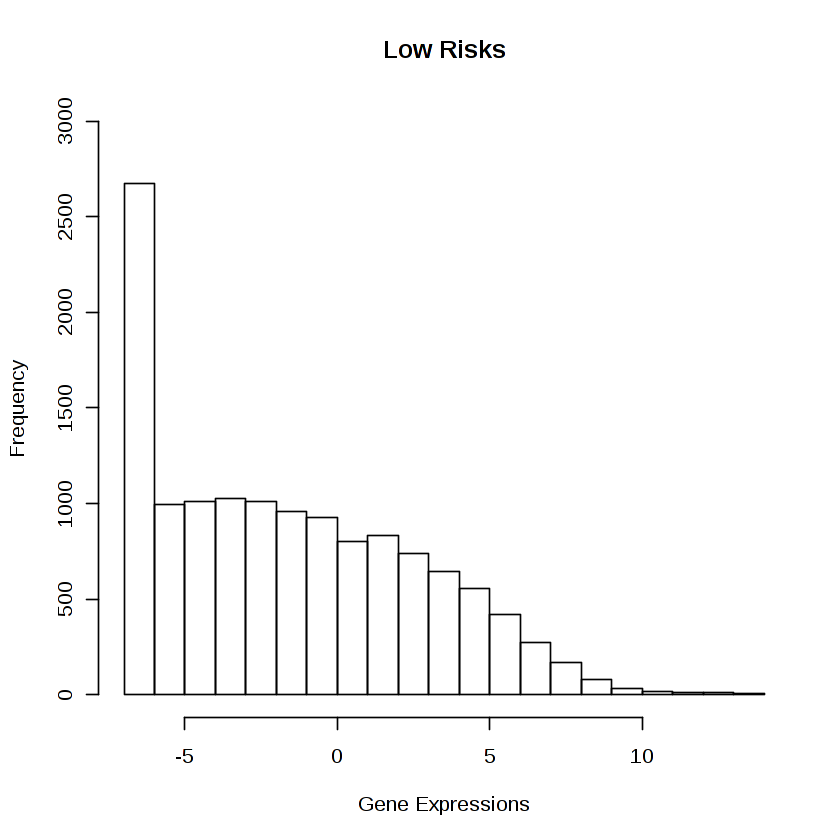

In [201]:
# Graph low risks
hist(as.numeric(unlist(low.data)), main="Low Risks", xlab="Gene Expressions", ylim=c(0,3000))

### Averaging Standard Risks for 471 Genes

In [202]:
ave.standard <- apply(stand.data, 2, 
                function (x) {
                    sum(x) / 44
                })
# ave.standard

# checking function
# mean(as.numeric(stand.data[,1]))

### Averaging Low Risks for 471 Genes

In [203]:
ave.low <- apply(stand.data, 2, 
                function (x) {
                    sum(x) / 28
                })
# ave.low

## 4. Apply T-Test to Standard & Low Risks to all 471 Genes

In [204]:
# apply above t-test to standard risk 
# and to low risk patients to all 471 genes
pvalue.vec <- apply (aml.data, 2, function (x){ t.test(x[1:44], x[45:72])$p.value})

# pvalue.vec

# get indexes where p-value is less than 0.1%
indexes <- which(pvalue.vec < 0.001)

## 5. Get Data Subsets for the Differentially Expressed Genes

In [205]:
subStand.data <- aml.data[1:44, indexes] # subset of standard risks
subLow.data <- aml.data[45:72, indexes]  # subset of low risks

# subStand.data
# subLow.data

## 6. Averages for Differentially Expressed Standard Risks vs. Low Risks

In [206]:
diffAve.standard <- apply(subStand.data, 2, 
                    function (x) {
                        sum(x) / 44
                    })

# diffAve.standard

In [207]:
diffAve.low <- apply(subLow.data, 2,
                    function (x) {
                        sum(x) / 28
                    })

# diffAve.low

### Plotting Averages of Standard Risks vs. Low Risks

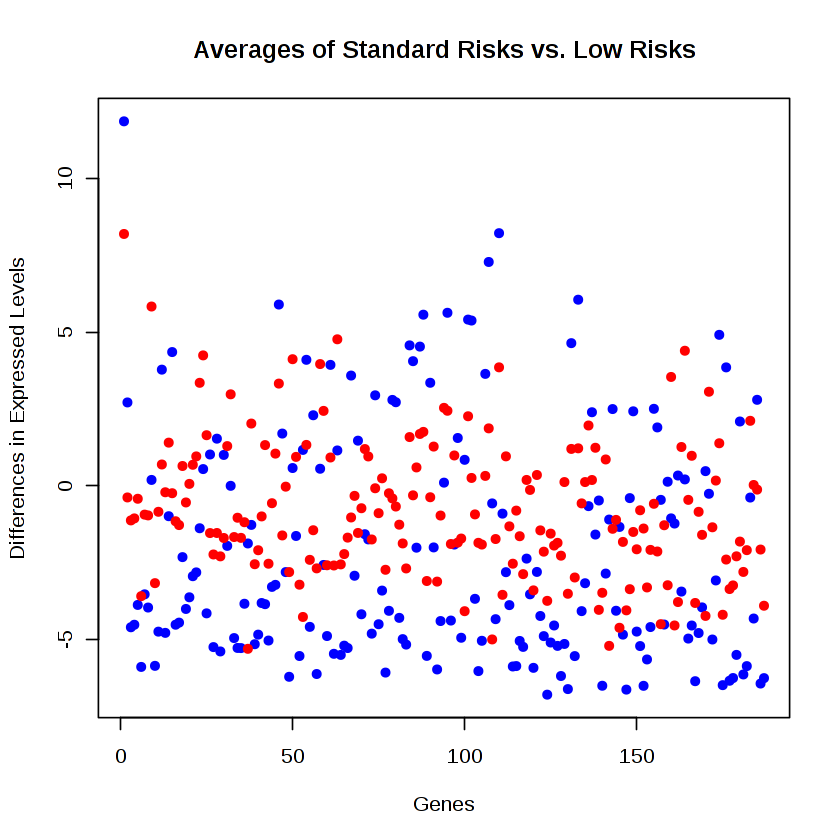

In [208]:
# BLUE = LOW RISKS
# RED = STANDARD RISKS

plot(diffAve.low, pch=16, col = "blue", 
     main = "Averages of Standard Risks vs. Low Risks",
     xlab = "Genes", ylab = "Differences in Expressed Levels")

points(diffAve.standard, pch=16, col="red")

## 7. Filtering the Data

### Differences between Averages

In [209]:
diffStandLow <- abs(diffAve.standard - diffAve.low)

# length(diffStandLow)

### Selects genes that have differences in expression levels above 3.5

In [210]:
dfFinal <- diffStandLow[which(diffStandLow > 3.5)]

# dfFinal

length(dfFinal)

[1] 64

### After this step, we've narrowed down from 471 genes to 64 genes that should be examined to determine whether a person is in the standard risks or the low risks category.

### We can further calculate the average of the difference. This calculated value then can be the threshold to determine which category of risks one belongs to.

In [211]:
mean(dfFinal)

[1] 4.292721

### The mean is 4.2927. This means if a person's genes expression levels when compared to the averages of standard risks individuals is equal or higher than 4.2927, then that person would fall into the low risk category. Else, the gene expression levels are similar, so the individual would be in the standard risks category.

In [212]:
promisingGenes <- labels(dfFinal)
promisingGenes

[1] "ENSG00000005381.7"  "ENSG00000078399.14" "ENSG00000085276.16"
 [4] "ENSG00000087495.15" "ENSG00000095917.12" "ENSG00000102362.14"
 [7] "ENSG00000102595.17" "ENSG00000104055.13" "ENSG00000105997.21"
[10] "ENSG00000106004.4"  "ENSG00000106006.6"  "ENSG00000112414.13"
[13] "ENSG00000114405.9"  "ENSG00000122592.7"  "ENSG00000125869.8" 
[16] "ENSG00000130529.14" "ENSG00000132975.7"  "ENSG00000137571.9" 
[19] "ENSG00000139117.12" "ENSG00000143995.18" "ENSG00000147257.12"
[22] "ENSG00000147488.10" "ENSG00000153132.11" "ENSG00000153898.11"
[25] "ENSG00000154864.10" "ENSG00000163106.9"  "ENSG00000164929.15"
[28] "ENSG00000165072.9"  "ENSG00000170549.3"  "ENSG00000170893.3" 
[31] "ENSG00000171517.5"  "ENSG00000172236.15" "ENSG00000172482.4" 
[34] "ENSG00000174059.15" "ENSG00000179542.14" "ENSG00000181433.8" 
[37] "ENSG00000188153.11" "ENSG00000188620.9"  "ENSG00000188626.6" 
[40] "ENSG00000197253.12" "ENSG00000198842.8"  "ENSG00000205213.12"
[43] "ENSG00000205696.4"  "ENSG00000206557.5"  "ENSG00000228401.4" 
[46] "ENSG00000230453.8"  "ENSG00000232431.3"  "ENSG00000233392.4" 
[49] "ENSG00000236939.2"  "ENSG00000248334.5"  "ENSG00000250696.4" 
[52] "ENSG00000253187.2"  "ENSG00000253293.4"  "ENSG00000254006.4" 
[55] "ENSG00000254369.5"  "ENSG00000259207.6"  "ENSG00000260182.1" 
[58] "ENSG00000261649.4"  "ENSG00000263961.5"  "ENSG00000267453.5" 
[61] "ENSG00000271447.4"  "ENSG00000271952.1"  "ENSG00000275325.3" 
[64] "ENSG00000277867.1"

# Make a new data set that has the patients and only the relevant gene

In [213]:
selectGeneVec <- subset(aml.data, select = c(promisingGenes))
selectGeneVec

,ENSG00000005381.7,ENSG00000078399.14,ENSG00000085276.16,ENSG00000087495.15,ENSG00000095917.12,ENSG00000102362.14,ENSG00000102595.17,ENSG00000104055.13,ENSG00000105997.21,ENSG00000106004.4,⋯,ENSG00000254369.5,ENSG00000259207.6,ENSG00000260182.1,ENSG00000261649.4,ENSG00000263961.5,ENSG00000267453.5,ENSG00000271447.4,ENSG00000271952.1,ENSG00000275325.3,ENSG00000277867.1
TARGET-20-PADZCG,9.286936,5.7896054,-1.3382669,-5.2292345,0.63336909,1.70220468,2.7787193,-1.3838270,5.6860942,4.8770593,⋯,2.03427000,2.4748790,-3.8429060,0.44426170,6.17764300,-4.122922,-1.1892640,0.3076292,3.4209710,0.1881677
TARGET-20-PAEAKL,7.392326,5.5695299,-4.4138368,5.4561538,-0.88816970,-3.39160529,1.7753524,5.8939922,3.0679983,1.6160142,⋯,1.72557800,-3.5460620,-6.9271450,0.32905610,-0.09396823,-6.927145,-3.7190590,1.9943340,1.5976850,1.4875200
TARGET-20-PAEIKD,5.096942,7.7895159,-2.2393181,4.0904088,4.14852964,-0.22589362,3.3323758,5.2710181,4.8739209,5.9467673,⋯,1.40850400,0.3727012,-3.9386180,0.50275460,2.49646600,-0.094660,-1.4805340,-0.2536362,-1.1586650,-1.6180070
TARGET-20-PAKIWK,9.262971,2.4952177,3.1668595,-2.7650021,0.23259112,0.79891060,-2.1766356,-0.9247765,1.2669290,3.7419274,⋯,-1.51116700,-0.8032400,-3.9708530,-6.92714500,-0.49013850,-2.117470,0.3100625,-6.9271450,-2.9591090,-6.9271450
TARGET-20-PAKIYW,7.006890,8.1418470,-3.9773418,4.9459101,-2.41233353,-2.21432161,1.4270258,3.7199298,5.1119063,5.1003304,⋯,1.04761200,-2.2143220,-5.5040460,-6.92714500,3.77484800,1.853887,-1.8131040,1.8703380,-3.2523160,-4.8017520
TARGET-20-PAKLPD,9.334855,9.3065931,-3.9341681,2.9246798,-1.60585033,-2.14828614,2.6916401,1.1255519,6.6551328,7.8103429,⋯,4.07745400,-1.1380160,-4.5551150,0.05357389,-1.94396600,-2.780917,-5.0070580,-0.8140431,-2.8990590,0.1608091
TARGET-20-PAKVGI,8.288355,7.7908934,5.6174099,-4.9702805,-2.98126897,2.83529375,1.8886194,-3.6571365,5.5653252,6.6920579,⋯,3.29122200,5.0725470,-6.9271450,0.37735180,-1.89575400,-3.890566,-2.1754910,-3.4562690,4.1790390,2.0038500
TARGET-20-PAMYAS,13.351231,-1.1470011,-3.5164534,-6.9271451,0.74050770,-2.12098421,-4.1657001,-0.0378915,-6.9271451,0.2191937,⋯,-6.92714500,-2.1209840,-2.3348080,-6.92714500,4.35846400,6.918226,3.6765020,-0.4411037,-6.9271450,-6.9271450
TARGET-20-PAMYGX,3.745859,8.0022580,7.8968633,-2.2885107,-5.63491028,4.14781129,3.8225335,-2.5652039,6.8429043,8.7801450,⋯,5.42484300,5.5533140,-5.6349100,1.80858800,-2.72638500,-6.927145,-2.3310960,0.5817107,5.1484460,3.2584790
TARGET-20-PANDIX,11.259260,4.3017747,-6.0217482,-0.9907162,1.44361462,1.83453127,-4.7597104,-0.4915189,2.5915024,1.8970021,⋯,-0.99071620,3.1155860,-4.0970080,-0.35288530,2.18567700,-6.021748,-0.9702943,-6.0217480,3.8551070,1.6088200


In [214]:
stdriskcenter <- selectGeneVec[1:1, ]
stdriskcenter

,ENSG00000005381.7,ENSG00000078399.14,ENSG00000085276.16,ENSG00000087495.15,ENSG00000095917.12,ENSG00000102362.14,ENSG00000102595.17,ENSG00000104055.13,ENSG00000105997.21,ENSG00000106004.4,⋯,ENSG00000254369.5,ENSG00000259207.6,ENSG00000260182.1,ENSG00000261649.4,ENSG00000263961.5,ENSG00000267453.5,ENSG00000271447.4,ENSG00000271952.1,ENSG00000275325.3,ENSG00000277867.1
TARGET-20-PADZCG,9.286936,5.789605,-1.338267,-5.229235,0.6333691,1.702205,2.778719,-1.383827,5.686094,4.877059,⋯,2.03427,2.474879,-3.842906,0.4442617,6.177643,-4.122922,-1.189264,0.3076292,3.420971,0.1881677


In [215]:
lowriskcenter <- selectGeneVec[44:44, ]
lowriskcenter

,ENSG00000005381.7,ENSG00000078399.14,ENSG00000085276.16,ENSG00000087495.15,ENSG00000095917.12,ENSG00000102362.14,ENSG00000102595.17,ENSG00000104055.13,ENSG00000105997.21,ENSG00000106004.4,⋯,ENSG00000254369.5,ENSG00000259207.6,ENSG00000260182.1,ENSG00000261649.4,ENSG00000263961.5,ENSG00000267453.5,ENSG00000271447.4,ENSG00000271952.1,ENSG00000275325.3,ENSG00000277867.1
TARGET-20-PATJHJ,7.528994,5.747838,-3.893247,-3.606986,-2.82466,-1.719604,-3.163432,-1.405506,1.038411,-0.09115055,⋯,-0.4501171,-5.041054,-6.927145,-4.250732,-2.614316,-6.002077,-3.743028,1.227737,-3.368229,-6.927145


In [216]:
centers = rbind(stdriskcenter, lowriskcenter)
centers

,ENSG00000005381.7,ENSG00000078399.14,ENSG00000085276.16,ENSG00000087495.15,ENSG00000095917.12,ENSG00000102362.14,ENSG00000102595.17,ENSG00000104055.13,ENSG00000105997.21,ENSG00000106004.4,⋯,ENSG00000254369.5,ENSG00000259207.6,ENSG00000260182.1,ENSG00000261649.4,ENSG00000263961.5,ENSG00000267453.5,ENSG00000271447.4,ENSG00000271952.1,ENSG00000275325.3,ENSG00000277867.1
TARGET-20-PADZCG,9.286936,5.789605,-1.338267,-5.229235,0.6333691,1.702205,2.778719,-1.383827,5.686094,4.87705929,⋯,2.0342700,2.474879,-3.842906,0.4442617,6.177643,-4.122922,-1.189264,0.3076292,3.420971,0.1881677
TARGET-20-PATJHJ,7.528994,5.747838,-3.893247,-3.606986,-2.8246600,-1.719604,-3.163432,-1.405506,1.038411,-0.09115055,⋯,-0.4501171,-5.041054,-6.927145,-4.2507320,-2.614316,-6.002077,-3.743028,1.2277370,-3.368229,-6.9271450


In [217]:
### K-Means Cluster Analysis
fit <- kmeans(selectGeneVec, centers) # 2 cluster solution
fit

K-means clustering with 2 clusters of sizes 45, 27

Cluster means:
  ENSG00000005381.7 ENSG00000078399.14 ENSG00000085276.16 ENSG00000087495.15
1          8.051312          6.1662383         -0.8961888         0.06053039
2         12.199257         -0.5757177         -4.7782940        -5.37968602
  ENSG00000095917.12 ENSG00000102362.14 ENSG00000102595.17 ENSG00000104055.13
1          -0.484594          0.3735193           1.148831          0.9373612
2           4.934995         -4.2598724          -3.830639         -2.9070444
  ENSG00000105997.21 ENSG00000106004.4 ENSG00000106006.6 ENSG00000112414.13
1           3.854680         4.5057798          2.102793          -1.078892
2          -2.387724        -0.0288784         -5.106922          -5.336236
  ENSG00000114405.9 ENSG00000122592.7 ENSG00000125869.8 ENSG00000130529.14
1         -1.861905          1.697150          0.885466          4.0868977
2         -5.101683         -4.644469         -3.092685          0.5029422
  ENSG000001329

In [218]:
patientCluster <- fit$cluster
patientCluster

TARGET-20-PADZCG TARGET-20-PAEAKL TARGET-20-PAEIKD TARGET-20-PAKIWK 
               1                1                1                1 
TARGET-20-PAKIYW TARGET-20-PAKLPD TARGET-20-PAKVGI TARGET-20-PAMYAS 
               1                1                1                2 
TARGET-20-PAMYGX TARGET-20-PANDIX TARGET-20-PANFMG TARGET-20-PANGDN 
               1                1                1                1 
TARGET-20-PANGJY TARGET-20-PANKNB TARGET-20-PANPKN TARGET-20-PANSBH 
               1                1                1                1 
TARGET-20-PANTNA TARGET-20-PAPBEJ TARGET-20-PAPXRJ TARGET-20-PARBIU 
               2                1                1                1 
TARGET-20-PARBRA TARGET-20-PARCUK TARGET-20-PARDDY TARGET-20-PARKCX 
               1                1                1                1 
TARGET-20-PARPDS TARGET-20-PARUNX TARGET-20-PARUTH TARGET-20-PARYGA 
               1                1                2                1 
TARGET-20-PARYVW TARGET-20-PASBPK TARGET-20-PASCFW TARGET-20-PASFEW 
               1                1                1                1 
TARGET-20-PASGMZ TARGET-20-PASGWH TARGET-20-PASIBG TARGET-20-PASMGW 
               1                1                1                1 
TARGET-20-PASVVS TARGET-20-PASVYA TARGET-20-PASVYL TARGET-20-PASWAJ 
               1                1                1                1 
TARGET-20-PASWAT TARGET-20-PASWLN TARGET-20-PASZLJ TARGET-20-PATJHJ 
               1                1                1                1 
TARGET-20-PALGKX TARGET-20-PANAEV TARGET-20-PANBZH TARGET-20-PANHYK 
               2                1                2                2 
TARGET-20-PANKKE TARGET-20-PANLIR TARGET-20-PANLIZ TARGET-20-PANLJN 
               2                2                2                1 
TARGET-20-PANNHB TARGET-20-PANPTM TARGET-20-PANTPW TARGET-20-PANUTB 
               2                2                2                2 
TARGET-20-PANUUA TARGET-20-PANVGE TARGET-20-PAPVZK TARGET-20-PAPWHS 
               2                2                2                2 
TARGET-20-PAPWIU TARGET-20-PAPWYK TARGET-20-PAPXWI TARGET-20-PARBFJ 
               2                2                2                1 
TARGET-20-PARCZL TARGET-20-PARMZF TARGET-20-PARPWL TARGET-20-PARTAL 
               2                2                2                2 
TARGET-20-PASHYZ TARGET-20-PASPGA TARGET-20-PASWPT TARGET-20-PASXYG 
               2                1                2                2

In [219]:
install.packages("ggplot2", repos = "https://cran.rstudio.com")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [220]:
library("ggplot2")

In [221]:
# IGNORE THIS JUNK
plot(patientCluster, type = "p", col = rgb(0, 0, 
    lapply(patientCluster,function(x){
        if(x%i > 44){
            0
        }else{
            1
        }
    })
           ))

ERROR: Error in parse(text = x, srcfile = src): <text>:4:13: unexpected input
3:     lapply(patientCluster,function(x){
4:         if(x%i > 44){
               ^


In [222]:
actualRiskCategory <- c(rep(1, 44), rep(2, 28))
actualRiskCategory

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

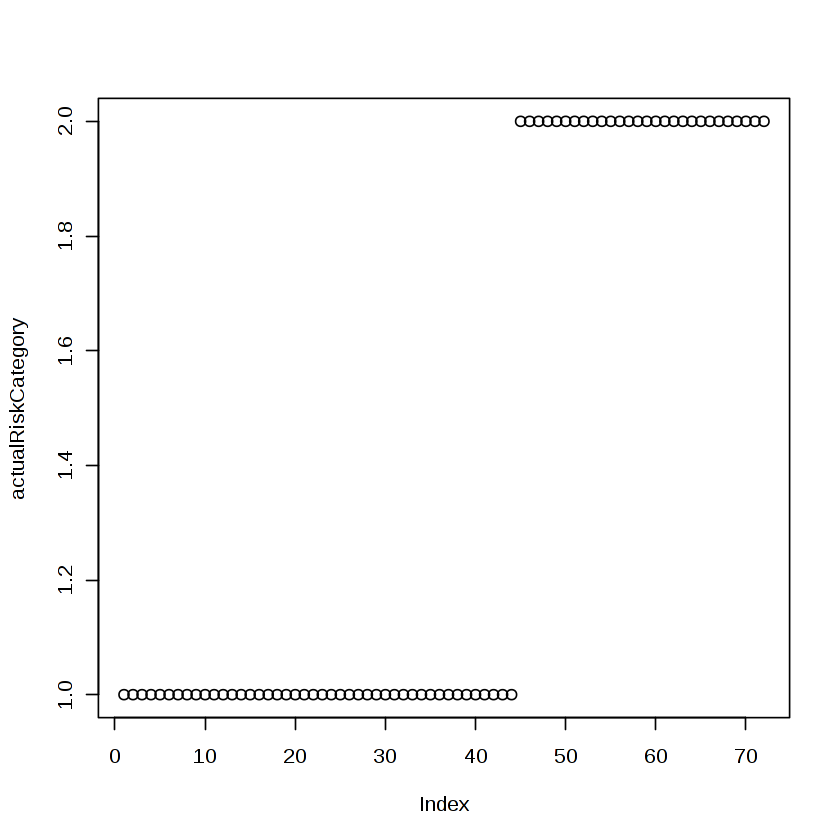

In [223]:
plot(actualRiskCategory)

In [224]:
comparison = rbind(patientCluster, actualRiskCategory)
comparison

,TARGET-20-PADZCG,TARGET-20-PAEAKL,TARGET-20-PAEIKD,TARGET-20-PAKIWK,TARGET-20-PAKIYW,TARGET-20-PAKLPD,TARGET-20-PAKVGI,TARGET-20-PAMYAS,TARGET-20-PAMYGX,TARGET-20-PANDIX,⋯,TARGET-20-PAPXWI,TARGET-20-PARBFJ,TARGET-20-PARCZL,TARGET-20-PARMZF,TARGET-20-PARPWL,TARGET-20-PARTAL,TARGET-20-PASHYZ,TARGET-20-PASPGA,TARGET-20-PASWPT,TARGET-20-PASXYG
patientCluster,1,1,1,1,1,1,1,2,1,1,⋯,2,1,2,2,2,2,2,1,2,2
actualRiskCategory,1,1,1,1,1,1,1,1,1,1,⋯,2,2,2,2,2,2,2,2,2,2


In [225]:
numberOfCorrectCluster <- 1
listThatIDontNeed <- apply(comparison, 2, function(x){
    if(x[1] == x[2]){
        #writes to the global numberOfCorrectCluster variable using <<- operator
        numberOfCorrectCluster <<- numberOfCorrectCluster + 1 
    }
    numberOfCorrectCluster
})
numberOfCorrectCluster

[1] 66

In [226]:
determineTheNumOfCorrectClusterMatches <- function(comparisonMatrix){
    numOfCorrectCluster <- 1
    listThatIDontNeed <- apply(comparisonMatrix, 2, function(x){
        if(x[1] == x[2]){
            #writes to the global numberOfCorrectCluster variable using <<- operator
            numOfCorrectCluster <<- numOfCorrectCluster + 1 
        }
    numOfCorrectCluster
})
numOfCorrectCluster
}

In [227]:
determineTheNumOfCorrectClusterMatches(comparison)

[1] 66

In [228]:
runKMeansAndDetNumOfCorrectMatches <- function(fullData, geneToAnalyze){
    selectGeneVec <- subset(fullData, select = geneToAnalyze)
    stdriskcenter <- selectGeneVec[1:1, ]
    lowriskcenter <- selectGeneVec[44:44, ]
    centers = rbind(stdriskcenter, lowriskcenter)
    fit <- kmeans(selectGeneVec, centers) # 2 cluster solution
    patientCluster <- fit$cluster
    actualRiskCategory <- c(rep(1, 44), rep(2, 28))
    comp = rbind(patientCluster, actualRiskCategory)
    determineTheNumOfCorrectClusterMatches(comp)
    
}

In [229]:
runKMeansAndDetNumOfCorrectMatches(aml.data,'ENSG00000005381.7')

[1] 23

In [230]:
listOfGeneFits <- sapply(promisingGenes, function(x){runKMeansAndDetNumOfCorrectMatches(aml.data, x)}, USE.NAMES = TRUE)
listOfGeneFits

ENSG00000005381.7 ENSG00000078399.14 ENSG00000085276.16 ENSG00000087495.15 
                23                 57                 44                 30 
ENSG00000095917.12 ENSG00000102362.14 ENSG00000102595.17 ENSG00000104055.13 
                17                 53                 55                 49 
ENSG00000105997.21  ENSG00000106004.4  ENSG00000106006.6 ENSG00000112414.13 
                59                 51                 61                 48 
 ENSG00000114405.9  ENSG00000122592.7  ENSG00000125869.8 ENSG00000130529.14 
                50                 58                 28                 24 
 ENSG00000132975.7  ENSG00000137571.9 ENSG00000139117.12 ENSG00000143995.18 
                11                 15                 11                 52 
ENSG00000147257.12 ENSG00000147488.10 ENSG00000153132.11 ENSG00000153898.11 
                24                 55                 55                 15 
ENSG00000154864.10  ENSG00000163106.9 ENSG00000164929.15  ENSG00000165072.9 
                48                 13                 58                 25 
 ENSG00000170549.3  ENSG00000170893.3  ENSG00000171517.5 ENSG00000172236.15 
                19                 63                 23                 18 
 ENSG00000172482.4 ENSG00000174059.15 ENSG00000179542.14  ENSG00000181433.8 
                13                 23                 20                 50 
ENSG00000188153.11  ENSG00000188620.9  ENSG00000188626.6 ENSG00000197253.12 
                47                 30                 56                 18 
 ENSG00000198842.8 ENSG00000205213.12  ENSG00000205696.4  ENSG00000206557.5 
                17                 59                 19                 49 
 ENSG00000228401.4  ENSG00000230453.8  ENSG00000232431.3  ENSG00000233392.4 
                59                 49                 53                 20 
 ENSG00000236939.2  ENSG00000248334.5  ENSG00000250696.4  ENSG00000253187.2 
                56                 62                 17                 19 
 ENSG00000253293.4  ENSG00000254006.4  ENSG00000254369.5  ENSG00000259207.6 
                19                 56                 62                 58 
 ENSG00000260182.1  ENSG00000261649.4  ENSG00000263961.5  ENSG00000267453.5 
                15                 58                 25                 16 
 ENSG00000271447.4  ENSG00000271952.1  ENSG00000275325.3  ENSG00000277867.1 
                16                 24                 50                 54

In [231]:
genesOfInterestFromCluster <- subset(listOfGeneFits, listOfGeneFits > 55)
genesOfInterestFromCluster

ENSG00000078399.14 ENSG00000105997.21  ENSG00000106006.6  ENSG00000122592.7 
                57                 59                 61                 58 
ENSG00000164929.15  ENSG00000170893.3  ENSG00000188626.6 ENSG00000205213.12 
                58                 63                 56                 59 
 ENSG00000228401.4  ENSG00000236939.2  ENSG00000248334.5  ENSG00000254006.4 
                59                 56                 62                 56 
 ENSG00000254369.5  ENSG00000259207.6  ENSG00000261649.4 
                62                 58                 58

In [232]:
genesOfInterest <- labels(genesOfInterestFromCluster)
genesOfInterest

[1] "ENSG00000078399.14" "ENSG00000105997.21" "ENSG00000106006.6" 
 [4] "ENSG00000122592.7"  "ENSG00000164929.15" "ENSG00000170893.3" 
 [7] "ENSG00000188626.6"  "ENSG00000205213.12" "ENSG00000228401.4" 
[10] "ENSG00000236939.2"  "ENSG00000248334.5"  "ENSG00000254006.4" 
[13] "ENSG00000254369.5"  "ENSG00000259207.6"  "ENSG00000261649.4"

In [233]:
runKMeansAndDetNumOfCorrectMatches(aml.data, genesOfInterest)

[1] 66

# This is the one that checks how the clusters work when we do all of the genes (I originally did this first but it was messy, so now that I have a function I'll just use that)

In [234]:
runKMeansAndDetNumOfCorrectMatches(aml.data,colnames(aml.data))

[1] 63